In [1]:
# Соберите все данные из папки data в один датафрэйм
import pandas as pd
import os
import seaborn as sns

In [2]:
op = '/data/2020-12-05/Petr_Ivanov/'

In [3]:
op.split('/')[-3:-1]

['2020-12-05', 'Petr_Ivanov']

In [4]:
path = '/data/'

In [5]:
df = pd.DataFrame()
for date in os.listdir(path):
    pathdate = path + date + '/'
    for name in os.listdir(pathdate):
        pathdatename = pathdate + name + '/'
        for file in os.listdir(pathdatename):
            df_file = pd.read_csv(pathdatename + file)
            df_file['name'] = pathdatename.split('/')[-2]
            df_file['date'] = pathdatename.split('/')[-3]
            df = pd.concat([df,df_file])

In [49]:
df

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...,...
0,0,18,4,Petr_Fedorov,2020-12-07
1,1,94,4,Petr_Fedorov,2020-12-07
0,0,95,2,Vasiliy_Ivanov,2020-12-07
1,1,83,3,Vasiliy_Ivanov,2020-12-07


In [18]:
# Выясним, какой пользователь купил больше всего товаров
df.groupby('name').agg({'quantity':'sum'}).sort_values('quantity').idxmax()

quantity    Alexey_Smirnov
dtype: object

In [7]:
top10 = df.groupby('product_id', as_index=False).agg({'quantity':'sum'}).sort_values('quantity', ascending=False).head(10)

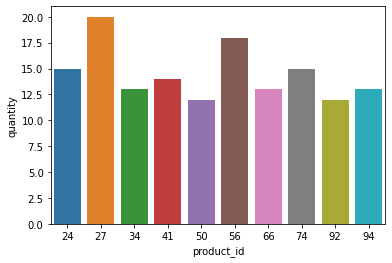

In [8]:
# Найдем топ-10 товаров по числу проданных единиц за всё время и постройте барплот
sns.barplot(x='product_id', y ='quantity', data = top10)

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df.date.dt.day
df

,Unnamed: 0,product_id,quantity,name,date,day
0,0,27,4,Petr_Ivanov,2020-12-05,5
1,1,89,1,Petr_Ivanov,2020-12-05,5
2,2,33,2,Petr_Ivanov,2020-12-05,5
3,3,8,3,Petr_Ivanov,2020-12-05,5
4,4,16,1,Petr_Ivanov,2020-12-05,5
...,...,...,...,...,...,...
0,0,18,4,Petr_Fedorov,2020-12-07,7
1,1,94,4,Petr_Fedorov,2020-12-07,7
0,0,95,2,Vasiliy_Ivanov,2020-12-07,7
1,1,83,3,Vasiliy_Ivanov,2020-12-07,7


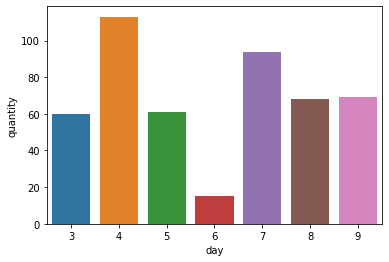

In [10]:
# Посмотрим на продажи по дням! Для визуализации снова используем барплот
dayplot = df.groupby('day', as_index=False).agg({'quantity':'sum'})
sns.barplot(x = 'day', y = 'quantity', data = dayplot)

In [16]:
# Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)?
df.drop_duplicates(subset=['date']).query('quantity > 1').groupby(['name','product_id']).count().sum()

Unnamed: 0    5
quantity      5
date          5
day           5
dtype: int64